In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('feature_matrix.csv')
ages = pd.read_csv('ages.csv')

In [3]:
X = df.copy(); y = ages.copy()
X.shape, y.shape

((22, 70), (22, 1))

In [4]:
# let's try a baseline linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
# prepare the train and val data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lr_model = LinearRegression(fit_intercept = True)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [7]:
lr_model.coef_.shape # a knob for each feature

(1, 70)

In [8]:
lr_model.intercept_

array([6.14771555])

In [9]:
# evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 15.13
Mean Squared Error: 504.75
R-squared: -0.58


Terrible performance. Can we do better?

In [11]:
# let's see if we can get better by combining EO and EC
prefixes = set()
for col in df.columns:
    prefixes.add(col[0 : -2])
len(prefixes)

35

In [12]:
averages_df = pd.DataFrame()
for prefix in prefixes:
    ec_col = f"{prefix}EC"
    eo_col = f"{prefix}EO"
    averages_df[prefix[0:-1]] = df[[ec_col, eo_col]].mean(axis=1)

In [13]:
averages_df.shape

(22, 35)

In [14]:
def evaluate_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

    return mae, mse, r2

In [15]:
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(averages_df, y, test_size=0.2, random_state=42)

lr_model_2 = LinearRegression(fit_intercept=True)
lr_model_2.fit(X_train_avg, y_train_avg)
y_pred_avg = lr_model_2.predict(X_test_avg)
evaluate_metrics(y_test_avg, y_pred_avg)

Mean Absolute Error: 35.26
Mean Squared Error: 1596.63
R-squared: -3.99


(35.26091780343829, 1596.6329338202383, -3.991544667257722)

Intersting: this is even worse. 

## Decision Trees & Random Forests:

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree = DecisionTreeRegressor(max_depth=5, random_state=42)

In [18]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [19]:
y_pred = tree.predict(X_test)

In [20]:
evaluate_metrics(y_test, y_pred)

Mean Absolute Error: 20.63
Mean Squared Error: 631.78
R-squared: -0.98


(20.629, 631.7762450000001, -0.9751185634662032)

In [21]:
from sklearn.tree import plot_tree

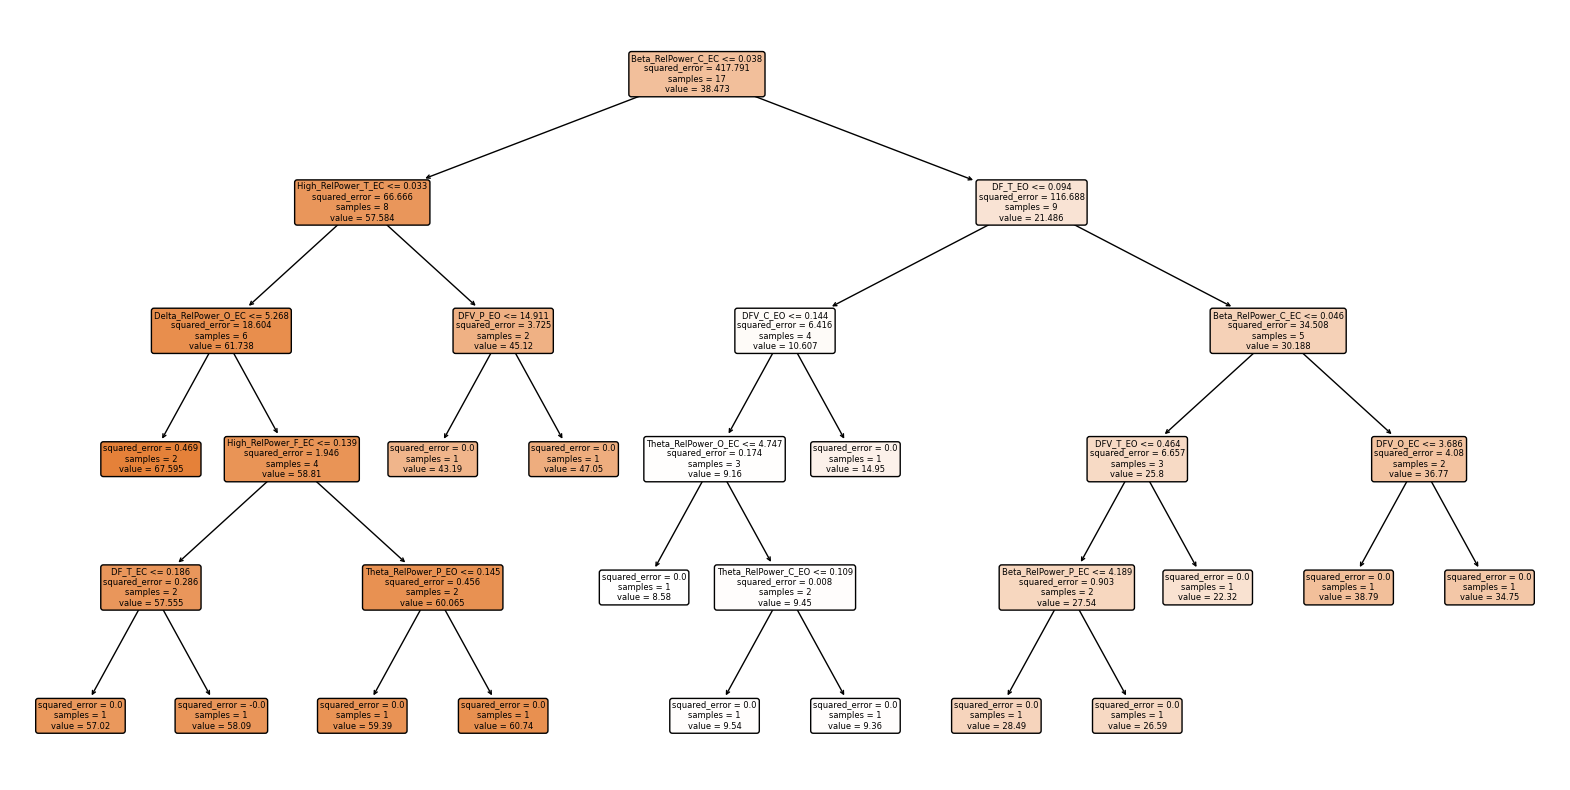

In [22]:
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
forest = RandomForestRegressor(random_state=42)

In [25]:
forest.fit(X_train, y_train.values.flatten())

RandomForestRegressor(random_state=42)

In [26]:
y_pred = forest.predict(X_test)

In [27]:
test_col = 'Delta_RelPower_F_EO'

In [28]:
X[test_col].mean()

0.615225607274117

In [29]:
idxs1 = X[X[test_col] > X[test_col].mean()].index
idxs2 = X.index[~ X.index.isin(idxs1)]

In [30]:
idxs1, idxs2

(Index([1, 2, 3, 4, 5, 7, 8, 10, 12, 13, 15, 20, 21], dtype='int64'),
 Index([0, 6, 9, 11, 14, 16, 17, 18, 19], dtype='int64'))

In [31]:
ys1 = ages.loc[idxs1].mean()
ys2 = ages.loc[idxs2].mean()

In [32]:
ys1, ys2

(0    37.533077
 dtype: float64,
 0    41.632222
 dtype: float64)

In [33]:
# predict 
y_test

,0
0,50.78
13,16.33
8,49.65
1,65.59
15,26.23


In [34]:
evaluate_metrics(y_test, y_pred)

Mean Absolute Error: 16.16
Mean Squared Error: 453.90
R-squared: -0.42


(16.155670333333337, 453.90340326152966, -0.4190356869184484)